# Exploring Dask Data Frames

In [1]:
import dask
import dask.dataframe as dd

In [2]:
df = dask.datasets.timeseries()

Unlike Pandas, Dask DataFrames are lazy and so no data is printed here.

In [3]:
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


But the column names and dtypes are known.

In [4]:
df.dtypes

id        int64
name     object
x       float64
y       float64
dtype: object

In [5]:
df.head(5)

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,994,Laura,0.414282,-0.034445
2000-01-01 00:00:01,986,Frank,0.379380,0.789719
2000-01-01 00:00:02,1038,Frank,0.862275,0.416600
2000-01-01 00:00:03,989,Alice,-0.220572,0.287479
2000-01-01 00:00:04,999,Ray,0.881163,-0.182371


### Use Standard Pandas Operations
Most common Pandas operations operate identically on Dask dataframes

In [6]:
df2 = df[df.y > 0]
df3 = df2.groupby('name').x.std()
df3

Dask Series Structure:
npartitions=1
    float64
        ...
Name: x, dtype: float64
Dask Name: sqrt, 157 tasks

Call `.compute()` when you want your result as a Pandas dataframe.

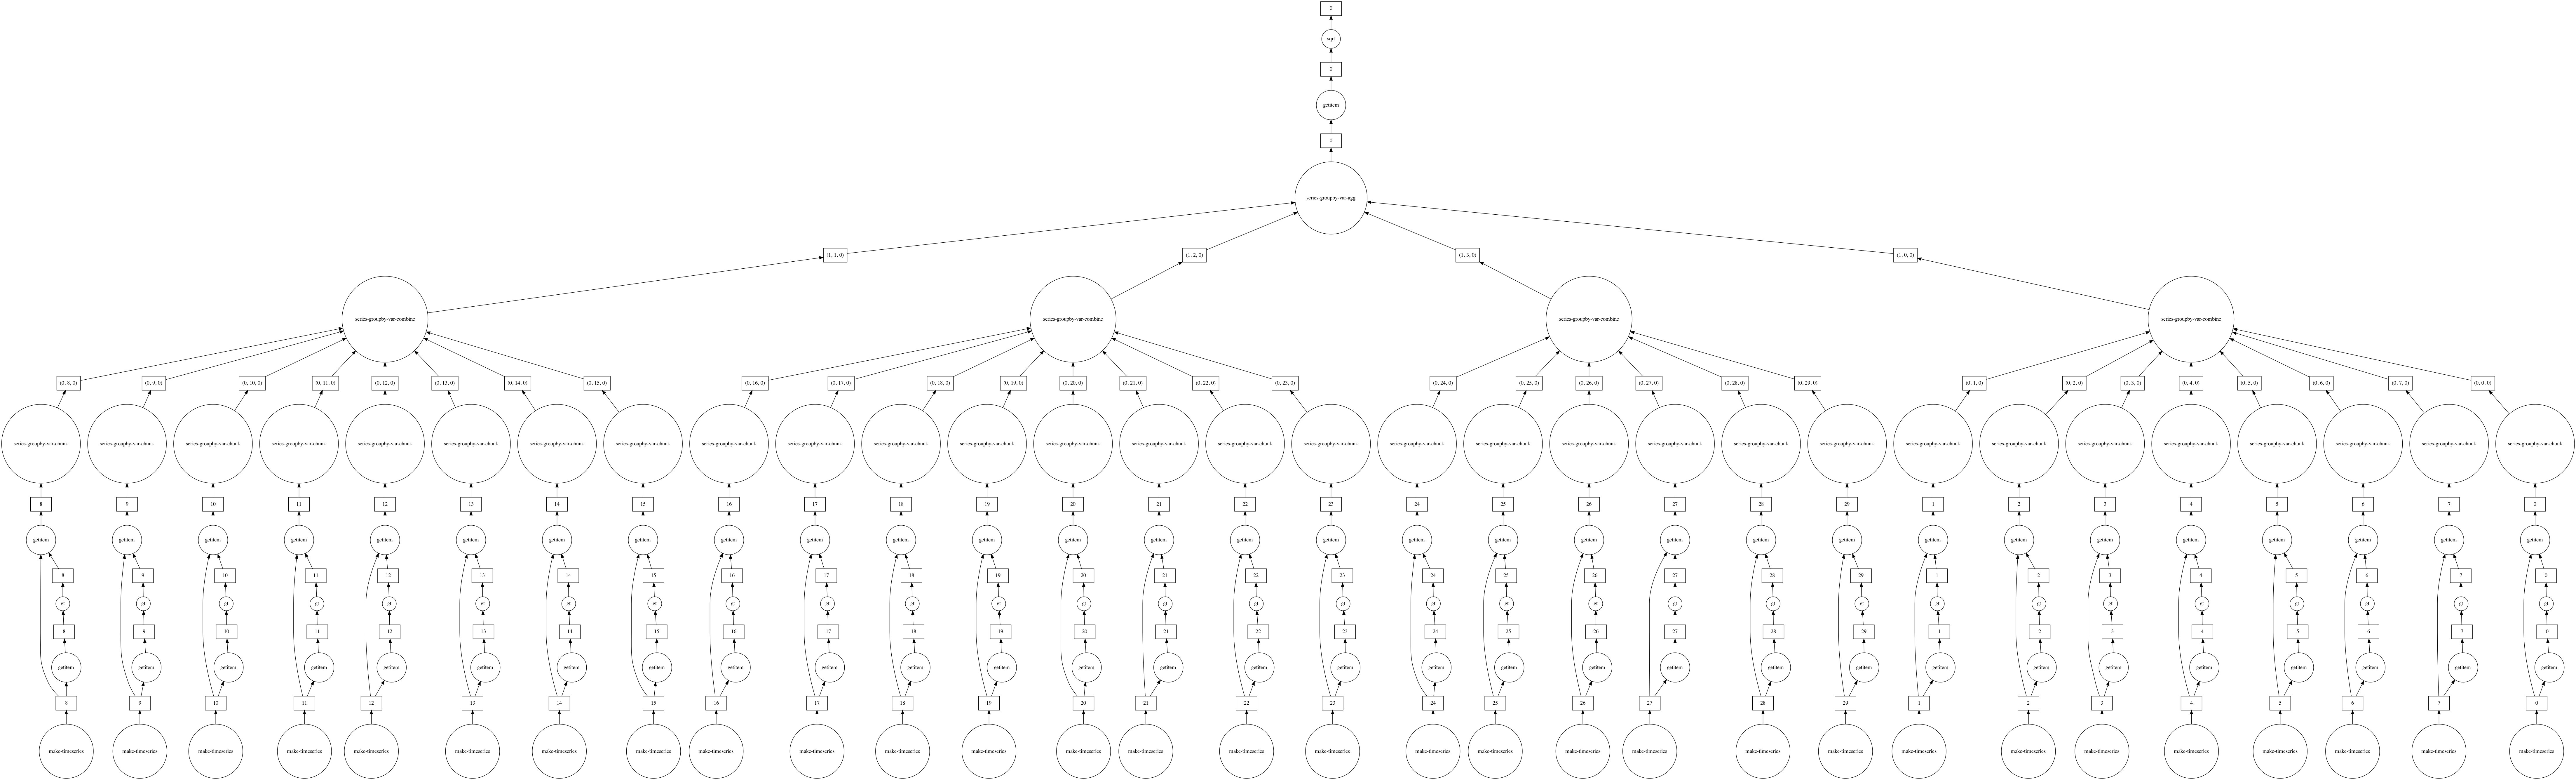

In [7]:
df3.visualize()

In [8]:
computed_df = df3.compute()

In [9]:
computed_df

name
Alice       0.577001
Bob         0.576667
Charlie     0.578548
Dan         0.577512
Edith       0.577793
Frank       0.575892
George      0.577552
Hannah      0.575902
Ingrid      0.578311
Jerry       0.579896
Kevin       0.577871
Laura       0.579012
Michael     0.577408
Norbert     0.576525
Oliver      0.577569
Patricia    0.578119
Quinn       0.575737
Ray         0.577318
Sarah       0.576232
Tim         0.575223
Ursula      0.575952
Victor      0.576478
Wendy       0.577497
Xavier      0.578790
Yvonne      0.577191
Zelda       0.577742
Name: x, dtype: float64

### Persist data in memory
If you have the available RAM for your dataset then you can persist data in memory.

This allows future computations to be much faster.


In [10]:
df = df.persist()

### Time Series Operations
Because we have a datetime index time-series operations work efficiently

In [11]:
%matplotlib inline

In [12]:
df[['x', 'y']].resample('1h').mean().head()

,x,y
timestamp,,
2000-01-01 00:00:00,-0.002427,-0.009035
2000-01-01 01:00:00,0.016195,-0.004633
2000-01-01 02:00:00,0.002939,0.002738
2000-01-01 03:00:00,-0.003018,-0.003132
2000-01-01 04:00:00,0.003585,-0.008981


<AxesSubplot:xlabel='timestamp'>

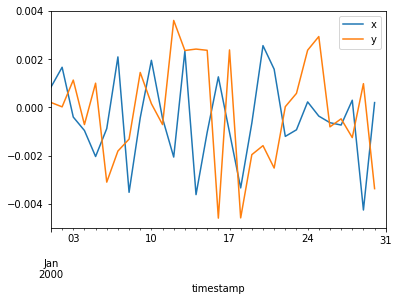

In [13]:
df[['x', 'y']].resample('24h').mean().compute().plot()

In [14]:
df[['x', 'y']].rolling(window='24h').mean().head()

,x,y
timestamp,,
2000-01-01 00:00:00,0.414282,-0.034445
2000-01-01 00:00:01,0.396831,0.377637
2000-01-01 00:00:02,0.551979,0.390625
2000-01-01 00:00:03,0.358841,0.364838
2000-01-01 00:00:04,0.463305,0.255396
